In [8]:
# fill namespace with nupy and matplotlib + static notebook plots
%pylab inline
# fill namespace with nupy and matplotlib + and interactive plots
#%pylab notebook 
#%matplotlib qt
from __future__ import division # use so 1/2 = 0.5, etc.
import sk_dsp_comm.sigsys as ss
import imp # for module reloading
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [9]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

# A Short capture
Pick a favorite FM radio station frequency in your location. The station frequency needs to be entered in MHz, for example 88.7 MHz is entered as `88,700,000 = 88.7E6` Hz. Generally the default `device_index` of `0` works, but I have experienced on some Windows 10 machines that the index needs to be set to `1`.

In [4]:
# Code for performing the capture
import rtlsdr
import numpy as np

def capture(Tc,fo=88.7e6,fs=2.4e6,gain=40,device_index=0):
    # Setup SDR
    sdr = rtlsdr.RtlSdr(device_index) #create a RtlSdr object
    #sdr.get_tuner_type()
    sdr.sample_rate = fs
    sdr.center_freq = fo
    #sdr.gain = 'auto'
    sdr.gain = gain
    # Capture samples
    Nc = np.ceil(Tc*fs)
    x = sdr.read_samples(Nc)
    sdr.close()
    return x

In [6]:
# From the docstring
#x = sdr_h.capture(Tc, fo=88700000.0, fs=2400000.0, gain=40, device_index=0)
x = capture(Tc=5,fo=88.7e6,fs=2.4e6,gain=40,device_index=1)

A quick to see what you have captured, you can use the function `psd()` get a spectrum view of the signalsthat lie near the specified center frequency of 88.7 MHz. In Colorado Springs 88.7 MHz is the location of a public radio classical music station. Spectrally the signal is centered at 0 kHz. The spectral *blobs* you see aboove and below 0 kHz are other stations. 

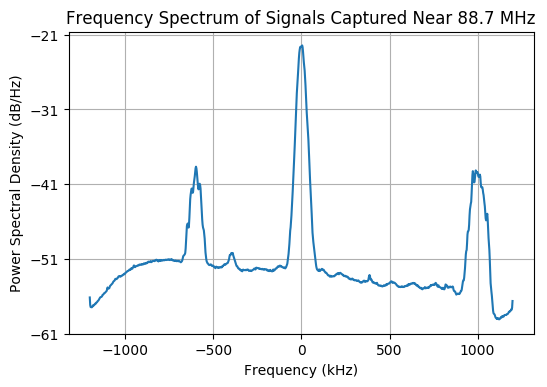

In [12]:
# Plot the power spectral density of the raw capture
psd(x,2**10,2400);
title(r'Frequency Spectrum of Signals Captured Near 88.7 MHz')
xlabel(r'Frequency (kHz)');